###  1. Libraries

In [99]:
# Import the necessary libraries
import pandas as pd
import numpy as np

# Ploting libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Outliers detection
from scipy.stats import zscore

# Modelling libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### 2.  Data

#### 2.0. Data Understanding

In [69]:
# Description of the data
df.describe(include="all")

,R&D Spend,Administration,Marketing Spend,State,Profit
count,1000.000000,1000.000000,1000.000000,1000,1000.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,California,NaN
freq,NaN,NaN,NaN,344,NaN
mean,81668.927200,122963.897612,226205.058419,NaN,119546.164656
std,46537.567891,12613.927535,91578.393542,NaN,42888.633848
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,43084.500000,116640.684850,150969.584600,NaN,85943.198543
50%,79936.000000,122421.612150,224517.887350,NaN,117641.466300
75%,124565.500000,129139.118000,308189.808525,NaN,155577.107425


##### 2.0.1 load dataset

In [14]:
# Load the data file
file_path = ("/home/munyao/Desktop/flat_iron_school/linear-regression/Data/1000_Companies.csv")
df = pd.read_csv(file_path,index_col = None)

##### 2.0.2 preview dataset

In [15]:
# Preview the data
df.tail(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000
999,161181.72,270939.860,295442.1700,New York,476485.43000


In [52]:
# Columns of the data
list(df.columns)

['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']

##### 2.0.3 shape of our data before cleaning

In [16]:
# Shape of the dataset
print(f"The dataframe has {df.shape[0]} columns and {df.shape[1]} rows")

The dataframe has 1000 columns and 5 rows


##### 2.0.4 data types

In [70]:
# datatypes in the columns
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

>the data set contains 3 numerical columns and one categorical columns

#### 2.1. Data Cleaning
The cleaning process involved the following:
* irrelevant data
* duplicates
* structural errors
* missing data
* filter out outliers
* data validation

##### 2.1.0 duplicates

In [53]:
# Check for duplicated in the dataset per colomn
df[df.duplicated(keep=False)]

,R&D Spend,Administration,Marketing Spend,State,Profit
335,84533.0,122941.3141,231885.6935,California,121248.7116
755,84533.0,122941.3141,231885.6935,California,121248.7116


> the dataset had only one duplicate and is droped to avoid contaminating the training data with the test data or vice versa

In [62]:
# Dropping the duplicated row
df1 = df.drop_duplicates(keep='last').head(3)

# Check to confirm after dropping duplicates
df1[df1.duplicated(keep=False)]

,R&D Spend,Administration,Marketing Spend,State,Profit


> the data set had no more duplicates

##### 2.1.1 missing data

In [65]:
# Check for missing values
df1.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

> data had no missing values

##### 2.1.2 outliers

>outliers increase the variability the data, which decreases statistical power so there is need to deal with them.

#### visualising the outliers in dataset

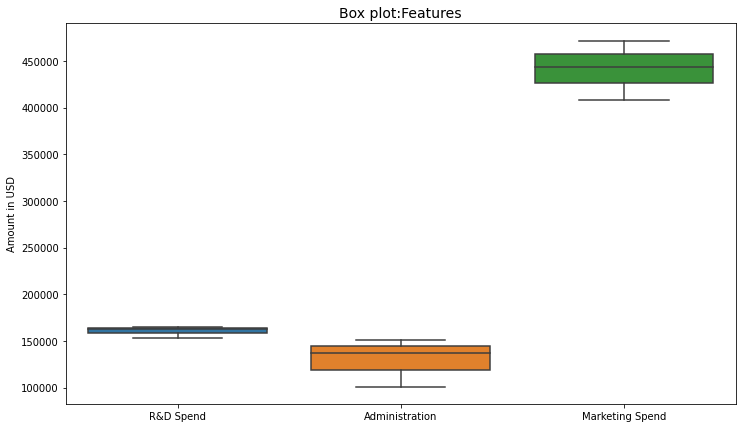

In [127]:
# Fig size
fig = plt.figure(figsize=(12,7))

# Ploting
sns.boxplot(df1.drop(labels="Profit",axis=1))

# Labels
plt.title("Box plot:Features", fontsize=14)
plt.ylabel("Amount in USD", fontsize=10)

# Display
plt.show()

###### Target column

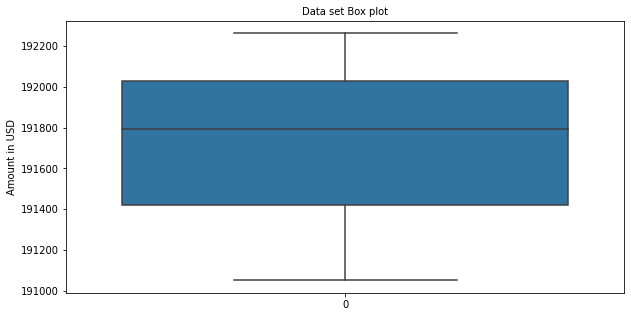

In [126]:
# Fig size
fig = plt.figure(figsize=(10,5))

# Ploting
sns.boxplot(df1["Profit"])

# Labels
plt.title("Data set Box plot", fontsize=10)
plt.ylabel("Amount in USD", fontsize=10)

# Display
plt.show()

>>The dataset had no outliers

In [128]:
# # Calculate upper and lower limits
# upper_limit = df["R&D Spend"].mean() + 3 * df["R&D Spend"].std()
# lower_limit = df["R&D Spend"].mean() -3 * df["R&D Spend"].std()

# # Select outliers
# df[~((df["R&D Spend"] < upper_limit) & (df["R&D Spend"] > lower_limit))]

# # Outliers removed
# df[(df["R&D Spend"] < upper_limit) & (df["R&D Spend"] > lower_limit)]

In [ ]:
### EDA

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create a Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model's performance
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("RMSE: ", rmse)
print("R2 score: ", r2)

NameError: name 'X' is not defined